Dataset real estate berhasil dimuat.
R-squared: 0.9708991391697177
Prediksi harga untuk properti baru: Rp.632318.41


C:\Users\zemm\Documents\GitHub\data-saint-uas\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


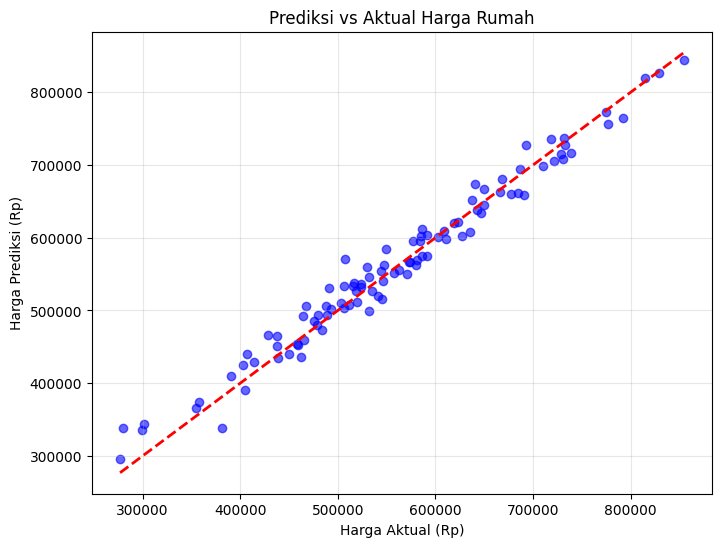

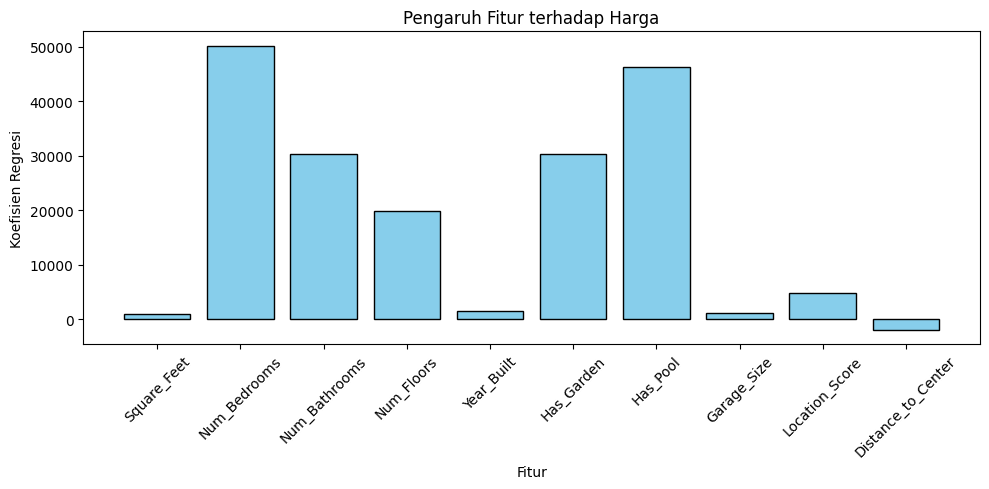

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

try:
    df = pd.read_csv("real_estate_dataset.csv")
    print("Dataset real estate berhasil dimuat.")
except FileNotFoundError:
    print("Error: File 'real_estate_dataset.csv' tidak ditemukan. Pastikan nama file sudah benar.")
    exit()

# Bagi data menjadi data latih dan data uji
x = df[['Square_Feet','Num_Bedrooms','Num_Bathrooms','Num_Floors','Year_Built','Has_Garden','Has_Pool','Garage_Size','Location_Score','Distance_to_Center']]
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bangun model regresi linear
model = LinearRegression()
model.fit(x_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(x_test)

# Evaluasi model (menggunakan R-squared)
r_squared = model.score(x_test, y_test)
print("R-squared:", r_squared)

# Gunakan model untuk prediksi baru
new_data = [[150.0, 3, 2, 2, 2000, 1, 0, 25, 7.5, 5.0]]  # Contoh data properti baru
predicted_price = model.predict(new_data)
print(f"Prediksi harga untuk properti baru: Rp.{predicted_price[0]:.2f}")

# ============ GRAFIK 1: Prediksi vs Aktual ============
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Harga Aktual (Rp)')
plt.ylabel('Harga Prediksi (Rp)')
plt.title('Prediksi vs Aktual Harga Rumah')
plt.grid(True, alpha=0.3)
plt.show()

# ============ GRAFIK 2: Koefisien Regresi ============
plt.figure(figsize=(10, 5))
coefficients = model.coef_
features = x.columns

bars = plt.bar(features, coefficients, color='skyblue', edgecolor='black')
plt.xlabel('Fitur')
plt.ylabel('Koefisien Regresi')
plt.title('Pengaruh Fitur terhadap Harga')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()